In [1]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,f1_score
import scikitplot as skplt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

C:\Users\lenovo\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [78]:
# using the SQLite Table to read data.
con = sqlite3.connect('database.sqlite') 

#filtering only positive and negative reviews i.e. 
# not taking into consideration those reviews with Score=3
filtered_data = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3 """, con) 
print(filtered_data.shape)

(525814, 10)


In [79]:
filtered_data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [80]:
# Give reviews with Score>3 a positive rating, and reviews with a score<3 a negative rating.
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

#changing reviews with score less than 3 to be positive and vice-versa
actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative
print("Number of data points in our data", filtered_data.shape)
filtered_data.head(3)

Number of data points in our data (525814, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [81]:
filtered_data['Score'].value_counts() #Data points in each class

positive    443777
negative     82037
Name: Score, dtype: int64

In [82]:
#Sorting the data taking productid as the parameter
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
sorted_data.shape

(525814, 10)

In [83]:
#Deleting the dublicates reviews which is created when user writed a review for the product, it automatically generates for the same product of different color etc
final = sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(364173, 10)

In [84]:
#Checking to see how much % of data still remains
(final['Id'].size*1.0)/(filtered_data['Id'].size*1.0)*100

69.25890143662969

In [85]:
duplicate_data= pd.read_sql_query("""SELECT * FROM Reviews WHERE Score != 3 AND Id=44737 OR Id=64422 ORDER BY ProductID""", con)
print(duplicate_data)

      Id   ProductId          UserId              ProfileName  \
0  64422  B000MIDROQ  A161DK06JJMCYF  J. E. Stephens "Jeanne"   
1  44737  B001EQ55RW  A2V0I904FH7ABY                      Ram   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     3                       1      5  1224892800   
1                     3                       2      4  1212883200   

                                        Summary  \
0             Bought This for My Son at College   
1  Pure cocoa taste with crunchy almonds inside   

                                                Text  
0  My son loves spaghetti so I didn't hesitate or...  
1  It was almost a 'love at first bite' - the per...  


In [86]:
#Dropping the data which has HelpfulnessNumerator<HelpfulnessDenominator which is impossible
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]
#Before starting the next phase of preprocessing lets see the number of entries left
print(final.shape)

#How many positive and negative reviews are present in our dataset?
final['Score'].value_counts()

(364171, 10)


positive    307061
negative     57110
Name: Score, dtype: int64

In [87]:
#Checking to see how much % of data still remains
(final['Id'].size*1.0)/(filtered_data['Id'].size*1.0)*100

69.25852107399194

In [88]:
print(final.shape)

(364171, 10)


In [3]:
stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [90]:
#Code for implementing step-by-step the checks mentioned in the pre-processing phase
# this code takes a while to run as it needs to run on 500k sentences.
from tqdm import tqdm
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in tqdm(final['Text'].values):
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

100%|█████████████████████████████████████████████████████████████████████████| 364171/364171 [09:30<00:00, 638.72it/s]


In [91]:
final['CleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review 
final['CleanedText']=final['CleanedText'].str.decode("utf-8")
final.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...


In [92]:
final.shape

(364171, 11)

In [93]:
# store final table into an SQlLite table for future.
conn = sqlite3.connect('data_all_after_preprocess.sqlite')
c=conn.cursor()
conn.text_factory = str
final.to_sql('Reviews', conn,  schema=None, if_exists='replace', index=False, index_label=None, chunksize=None, dtype=None)

In [94]:
#reading from Database
con = sqlite3.connect('data_all_after_preprocess.sqlite')
#filtering only positive and negative reviews i.e. 
# not taking into consideration those reviews with Score=3
data = pd.read_sql_query("""SELECT * FROM Reviews""", con)
print(data.shape)

(364171, 11)


In [95]:
data['Score'].value_counts()

positive    307061
negative     57110
Name: Score, dtype: int64

In [96]:
final=data.sort_values('Time', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [97]:
print(final.shape)

(364171, 11)


In [98]:
final = final.head(60000)
print(final.shape)

(60000, 11)


In [99]:
# store final table into an SQlLite table for future.
conn = sqlite3.connect('Data_60k_timebased.sqlite')
c=conn.cursor()
conn.text_factory = str
final.to_sql('Reviews', conn,  schema=None, if_exists='replace', index=False, index_label=None, chunksize=None, dtype=None)

In [100]:
X_train_data = final[:40000]
X_cv_data = final[40000:50000]
X_test_data = final[50000:60000]
print(X_train_data.shape)
print(X_cv_data.shape)
print(X_test_data.shape)

(40000, 11)
(10000, 11)
(10000, 11)


In [101]:
# store final table into an SQlLite table for future.
conn = sqlite3.connect('X_train_40k_timebased.sqlite')
c=conn.cursor()
conn.text_factory = str
X_train_data.to_sql('Reviews', conn,  schema=None, if_exists='replace', index=False, index_label=None, chunksize=None, dtype=None)

In [102]:
# store final table into an SQlLite table for future.
conn = sqlite3.connect('X_cv_10k_timebased.sqlite')
c=conn.cursor()
conn.text_factory = str
X_cv_data.to_sql('Reviews', conn,  schema=None, if_exists='replace', index=False, index_label=None, chunksize=None, dtype=None)

In [103]:
# store final table into an SQlLite table for future.
conn = sqlite3.connect('X_test_10k_timebased.sqlite')
c=conn.cursor()
conn.text_factory = str
X_test_data.to_sql('Reviews', conn,  schema=None, if_exists='replace', index=False, index_label=None, chunksize=None, dtype=None)

In [5]:
#reading from Database
con = sqlite3.connect('X_train_40k_timebased.sqlite')
#filtering only positive and negative reviews i.e. 
# not taking into consideration those reviews with Score=3
X_train_data = pd.read_sql_query("""SELECT * FROM Reviews""", con)
print(X_train_data.shape)

(40000, 11)


In [6]:
#reading from Database
con = sqlite3.connect('X_cv_10k_timebased.sqlite')
#filtering only positive and negative reviews i.e. 
# not taking into consideration those reviews with Score=3
X_cv_data = pd.read_sql_query("""SELECT * FROM Reviews""", con)
print(X_cv_data.shape)

(10000, 11)


In [7]:
#reading from Database
con = sqlite3.connect('X_test_10k_timebased.sqlite')
#filtering only positive and negative reviews i.e. 
# not taking into consideration those reviews with Score=3
X_test_data = pd.read_sql_query("""SELECT * FROM Reviews""", con)
print(X_test_data.shape)

(10000, 11)


In [8]:
y_train = X_train_data['Score']
y_cv = X_cv_data['Score']
y_test = X_test_data['Score']
print("Data")
print(X_train_data.shape)
print(X_cv_data.shape)
print(X_test_data.shape)
print("Label")
print(y_train.shape)
print(y_cv.shape)
print(y_test.shape)

Data
(40000, 11)
(10000, 11)
(10000, 11)
Label
(40000,)
(10000,)
(10000,)


# BOW

In [72]:
#count_vect = CountVectorizer(min_df = 50,max_features=2000)
X_train = count_vect.fit_transform(X_train_data['CleanedText'])
X_cv = count_vect.transform(X_cv_data['CleanedText'])
X_test = count_vect.transform(X_test_data['CleanedText'])
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)

(40000, 2000)
(10000, 2000)
(10000, 2000)


# BOW | BRUTE |

In [108]:
for i in tqdm(range(1,30,2)):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute')

    # fitting the model on train Data
    knn.fit(X_train, y_train)

    # predict the response on the crossvalidation data
    pred = knn.predict(X_cv)

    print("*************************************************************************")
    print("For k = ",i)
    print('Accuracy = ', accuracy_score(y_cv, pred)*100)
    print("f1_score = ",np.round(f1_score(y_cv, pred, average='macro')*100))
    print("precision_score = ",np.round(precision_score(y_cv, pred, average='macro')*100))
    print("recall_score = ",np.round(recall_score(y_cv, pred, average='macro')*100))

  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

*************************************************************************
For k =  1
Accuracy =  83.7
f1_score =  55.0
precision_score =  57.0
recall_score =  55.0


  7%|█████▌                                                                             | 1/15 [00:23<05:26, 23.35s/it]

*************************************************************************
For k =  3
Accuracy =  85.35000000000001
f1_score =  55.0
precision_score =  58.0
recall_score =  54.0


 13%|███████████                                                                        | 2/15 [00:46<05:04, 23.44s/it]

*************************************************************************
For k =  5
Accuracy =  87.77000000000001
f1_score =  52.0
precision_score =  68.0
recall_score =  52.0


 20%|████████████████▌                                                                  | 3/15 [01:13<04:53, 24.45s/it]

*************************************************************************
For k =  7
Accuracy =  87.86
f1_score =  50.0
precision_score =  70.0
recall_score =  52.0


 27%|██████████████████████▏                                                            | 4/15 [01:38<04:30, 24.64s/it]

*************************************************************************
For k =  9
Accuracy =  87.9
f1_score =  49.0
precision_score =  73.0
recall_score =  51.0


 33%|███████████████████████████▋                                                       | 5/15 [02:03<04:06, 24.65s/it]

*************************************************************************
For k =  11
Accuracy =  88.02
f1_score =  49.0
precision_score =  82.0
recall_score =  51.0


 40%|█████████████████████████████████▏                                                 | 6/15 [02:28<03:42, 24.72s/it]

*************************************************************************
For k =  13
Accuracy =  87.98
f1_score =  49.0
precision_score =  84.0
recall_score =  51.0


 47%|██████████████████████████████████████▋                                            | 7/15 [02:54<03:20, 25.07s/it]

*************************************************************************
For k =  15
Accuracy =  87.89
f1_score =  48.0
precision_score =  80.0
recall_score =  51.0


 53%|████████████████████████████████████████████▎                                      | 8/15 [03:19<02:55, 25.12s/it]

*************************************************************************
For k =  17
Accuracy =  87.88
f1_score =  48.0
precision_score =  82.0
recall_score =  50.0


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [03:45<02:32, 25.43s/it]

*************************************************************************
For k =  19
Accuracy =  87.87
f1_score =  47.0
precision_score =  81.0
recall_score =  50.0


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [04:10<02:06, 25.38s/it]

*************************************************************************
For k =  21
Accuracy =  87.86
f1_score =  47.0
precision_score =  83.0
recall_score =  50.0


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [04:36<01:41, 25.48s/it]

*************************************************************************
For k =  23
Accuracy =  87.85
f1_score =  47.0
precision_score =  86.0
recall_score =  50.0


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [05:04<01:18, 26.03s/it]

*************************************************************************
For k =  25
Accuracy =  87.85
f1_score =  47.0
precision_score =  86.0
recall_score =  50.0


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [05:30<00:52, 26.13s/it]

*************************************************************************
For k =  27
Accuracy =  87.82
f1_score =  47.0
precision_score =  77.0
recall_score =  50.0


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [05:56<00:26, 26.03s/it]

*************************************************************************
For k =  29
Accuracy =  87.82
f1_score =  47.0
precision_score =  77.0
recall_score =  50.0


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [06:20<00:00, 25.48s/it]


***Test Data Report***
Best k = 11 
Accuracy =  87.85
f1_score =  49.0
precision_score =  78.0
recall_score =  51.0


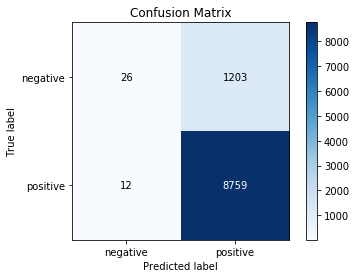

In [110]:
knn = KNeighborsClassifier(n_neighbors=11,algorithm='brute')
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print("***Test Data Report***")
print("Best k = 11 ")
print('Accuracy = ', accuracy_score(y_test, pred)*100)
print("f1_score = ",np.round(f1_score(y_test, pred, average='macro')*100))
print("precision_score = ",np.round(precision_score(y_test, pred, average='macro')*100))
print("recall_score = ",np.round(recall_score(y_test, pred, average='macro')*100))
skplt.metrics.plot_confusion_matrix(y_test, pred)
plt.show()

# BOW | KD_TREE |

In [64]:
from sklearn.decomposition import TruncatedSVD
count_vect = CountVectorizer(min_df=50,max_features=2000)
train = count_vect.fit_transform(X_train_data['CleanedText'])
cv = count_vect.transform(X_cv_data['CleanedText'])
test = count_vect.transform(X_test_data['CleanedText'])
print(train.shape)
print(cv.shape)
print(test.shape)

(40000, 2000)
(10000, 2000)
(10000, 2000)


In [65]:
from sklearn.decomposition import TruncatedSVD
svd1 = TruncatedSVD(n_components=1999)
X_train = svd1.fit_transform(train)
len(X_train)

40000

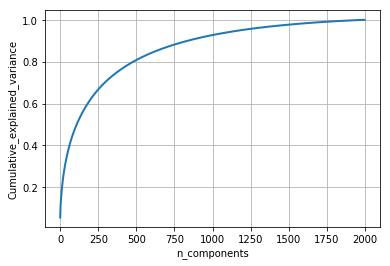

In [67]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 1999
pca_data = pca.fit_transform(X_train)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 750-dimensions, approx. 90% of variance is expalined.

In [68]:
svd = TruncatedSVD(n_components=750)
X_train = svd.fit_transform(train)
X_cv = svd.transform(cv)
X_test = svd.transform(test)
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)

(40000, 750)
(10000, 750)
(10000, 750)


In [69]:
for i in tqdm(range(1,30,2)):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree')

    # fitting the model on train Data
    knn.fit(X_train, y_train)

    # predict the response on the crossvalidation data
    pred = knn.predict(X_cv)

    print("*************************************************************************")
    print("For k = ",i)
    print('Accuracy = ', np.round(accuracy_score(y_cv, pred)*100))
    print("f1_score = ",np.round(f1_score(y_cv, pred, average='macro')*100))
    print("precision_score = ",np.round(precision_score(y_cv, pred, average='macro')*100))
    print("recall_score = ",np.round(recall_score(y_cv, pred, average='macro')*100))

  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

*************************************************************************
For k =  1
Accuracy =  82.0
f1_score =  57.0
precision_score =  57.0
recall_score =  57.0


  7%|█████▎                                                                          | 1/15 [11:19<2:38:33, 679.53s/it]

*************************************************************************
For k =  3
Accuracy =  86.0
f1_score =  57.0
precision_score =  63.0
recall_score =  56.0


 13%|██████████▋                                                                     | 2/15 [22:53<2:28:08, 683.74s/it]

*************************************************************************
For k =  5
Accuracy =  87.0
f1_score =  54.0
precision_score =  64.0
recall_score =  54.0


 20%|████████████████                                                                | 3/15 [34:38<2:18:01, 690.17s/it]

*************************************************************************
For k =  7
Accuracy =  88.0
f1_score =  53.0
precision_score =  67.0
recall_score =  53.0


 27%|█████████████████████▎                                                          | 4/15 [46:16<2:06:58, 692.59s/it]

*************************************************************************
For k =  9
Accuracy =  88.0
f1_score =  52.0
precision_score =  72.0
recall_score =  53.0


 33%|██████████████████████████▋                                                     | 5/15 [57:38<1:54:52, 689.27s/it]

*************************************************************************
For k =  11
Accuracy =  88.0
f1_score =  52.0
precision_score =  74.0
recall_score =  52.0


 40%|███████████████████████████████▏                                              | 6/15 [1:09:04<1:43:16, 688.55s/it]

*************************************************************************
For k =  13
Accuracy =  88.0
f1_score =  51.0
precision_score =  78.0
recall_score =  52.0


 47%|████████████████████████████████████▍                                         | 7/15 [1:20:26<1:31:30, 686.32s/it]

*************************************************************************
For k =  15
Accuracy =  88.0
f1_score =  50.0
precision_score =  78.0
recall_score =  52.0


 53%|█████████████████████████████████████████▌                                    | 8/15 [1:31:55<1:20:11, 687.41s/it]

*************************************************************************
For k =  17
Accuracy =  88.0
f1_score =  50.0
precision_score =  78.0
recall_score =  51.0


 60%|██████████████████████████████████████████████▊                               | 9/15 [1:43:20<1:08:38, 686.50s/it]

*************************************************************************
For k =  19
Accuracy =  88.0
f1_score =  49.0
precision_score =  77.0
recall_score =  51.0


 67%|████████████████████████████████████████████████████▋                          | 10/15 [1:55:00<57:32, 690.56s/it]

*************************************************************************
For k =  21
Accuracy =  88.0
f1_score =  49.0
precision_score =  80.0
recall_score =  51.0


 73%|█████████████████████████████████████████████████████████▉                     | 11/15 [2:06:36<46:09, 692.30s/it]

*************************************************************************
For k =  23
Accuracy =  88.0
f1_score =  49.0
precision_score =  84.0
recall_score =  51.0


 80%|███████████████████████████████████████████████████████████████▏               | 12/15 [2:18:00<34:29, 689.88s/it]

*************************************************************************
For k =  25
Accuracy =  88.0
f1_score =  48.0
precision_score =  81.0
recall_score =  51.0


 87%|████████████████████████████████████████████████████████████████████▍          | 13/15 [2:29:20<22:53, 686.89s/it]

*************************************************************************
For k =  27
Accuracy =  88.0
f1_score =  48.0
precision_score =  85.0
recall_score =  51.0


 93%|█████████████████████████████████████████████████████████████████████████▋     | 14/15 [2:40:18<11:17, 677.96s/it]

*************************************************************************
For k =  29
Accuracy =  88.0
f1_score =  48.0
precision_score =  84.0
recall_score =  50.0


100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [2:51:38<00:00, 678.79s/it]


***Test Data Report***
Best k = 17 
Accuracy =  87.98
f1_score =  50.0
precision_score =  82.0
recall_score =  52.0


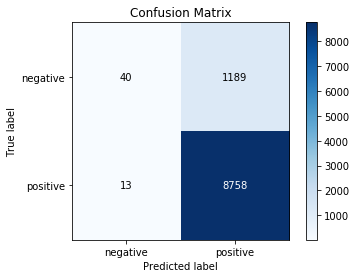

In [71]:
knn = KNeighborsClassifier(n_neighbors=17,algorithm='kd_tree')
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print("***Test Data Report***")
print("Best k = 17 ")
print('Accuracy = ', accuracy_score(y_test, pred)*100)
print("f1_score = ",np.round(f1_score(y_test, pred, average='macro')*100))
print("precision_score = ",np.round(precision_score(y_test, pred, average='macro')*100))
print("recall_score = ",np.round(recall_score(y_test, pred, average='macro')*100))
skplt.metrics.plot_confusion_matrix(y_test, pred)
plt.show()

## OBSERVATION :-
- > BOW | BRUTE |
    1. K = 11
    2. f1_score =  49.0
    3. Accuracy =  87.85
- > BOW | KD_TREE |
    1. k = 17
    2. f1_score =  50.0
    3. Accuracy =  87.98
- F1 Score is slightly larger in kd-tree as comared to brute force algorithm and also the accuracy is mre as well

# TF - IDF

In [9]:
tf_idf_vect = TfidfVectorizer(min_df=50,max_features=2000)
X_train = tf_idf_vect.fit_transform(X_train_data['CleanedText'])
X_cv = tf_idf_vect.transform(X_cv_data['CleanedText'])
X_test = tf_idf_vect.transform(X_test_data['CleanedText'])
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)

(40000, 2000)
(10000, 2000)
(10000, 2000)


# TF - IDF | BRUTE |

In [10]:
for i in tqdm(range(1,30,2)):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute')

    # fitting the model on train Data
    knn.fit(X_train, y_train)

    # predict the response on the crossvalidation data
    pred = knn.predict(X_cv)

    print("*************************************************************************")
    print("For k = ",i)
    print('Accuracy = ', accuracy_score(y_cv, pred)*100)
    print("f1_score = ",np.round(f1_score(y_cv, pred, average='macro')*100))
    print("precision_score = ",np.round(precision_score(y_cv, pred, average='macro')*100))
    print("recall_score = ",np.round(recall_score(y_cv, pred, average='macro')*100))

  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

*************************************************************************
For k =  1
Accuracy =  87.11
f1_score =  50.0
precision_score =  59.0
recall_score =  52.0


  7%|█████▌                                                                             | 1/15 [00:19<04:36, 19.78s/it]

*************************************************************************
For k =  3
Accuracy =  87.98
f1_score =  56.0
precision_score =  71.0
recall_score =  55.0


 13%|███████████                                                                        | 2/15 [00:39<04:18, 19.87s/it]

*************************************************************************
For k =  5
Accuracy =  88.44
f1_score =  56.0
precision_score =  78.0
recall_score =  55.0


 20%|████████████████▌                                                                  | 3/15 [01:02<04:07, 20.63s/it]

*************************************************************************
For k =  7
Accuracy =  88.61
f1_score =  56.0
precision_score =  82.0
recall_score =  55.0


 27%|██████████████████████▏                                                            | 4/15 [01:24<03:52, 21.10s/it]

*************************************************************************
For k =  9
Accuracy =  88.69
f1_score =  55.0
precision_score =  85.0
recall_score =  55.0


 33%|███████████████████████████▋                                                       | 5/15 [01:47<03:35, 21.56s/it]

*************************************************************************
For k =  11
Accuracy =  88.64
f1_score =  55.0
precision_score =  87.0
recall_score =  54.0


 40%|█████████████████████████████████▏                                                 | 6/15 [02:09<03:15, 21.77s/it]

*************************************************************************
For k =  13
Accuracy =  88.64
f1_score =  54.0
precision_score =  88.0
recall_score =  54.0


 47%|██████████████████████████████████████▋                                            | 7/15 [02:31<02:56, 22.03s/it]

*************************************************************************
For k =  15
Accuracy =  88.64999999999999
f1_score =  54.0
precision_score =  89.0
recall_score =  54.0


 53%|████████████████████████████████████████████▎                                      | 8/15 [02:54<02:35, 22.18s/it]

*************************************************************************
For k =  17
Accuracy =  88.64
f1_score =  54.0
precision_score =  91.0
recall_score =  54.0


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [03:17<02:14, 22.47s/it]

*************************************************************************
For k =  19
Accuracy =  88.64999999999999
f1_score =  54.0
precision_score =  91.0
recall_score =  54.0


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [03:41<01:54, 22.90s/it]

*************************************************************************
For k =  21
Accuracy =  88.64
f1_score =  54.0
precision_score =  91.0
recall_score =  54.0


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [04:05<01:32, 23.12s/it]

*************************************************************************
For k =  23
Accuracy =  88.59
f1_score =  53.0
precision_score =  91.0
recall_score =  53.0


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [04:28<01:09, 23.17s/it]

*************************************************************************
For k =  25
Accuracy =  88.46000000000001
f1_score =  52.0
precision_score =  90.0
recall_score =  53.0


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [04:52<00:46, 23.44s/it]

*************************************************************************
For k =  27
Accuracy =  88.5
f1_score =  53.0
precision_score =  92.0
recall_score =  53.0


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [05:17<00:23, 23.81s/it]

*************************************************************************
For k =  29
Accuracy =  88.41
f1_score =  52.0
precision_score =  90.0
recall_score =  53.0


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [05:41<00:00, 24.03s/it]


***Test Data Report***
Best k = 7 
Accuracy =  88.13
f1_score =  54.0
precision_score =  76.0
recall_score =  54.0


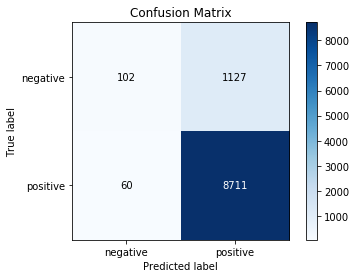

In [11]:
knn = KNeighborsClassifier(n_neighbors=7,algorithm='brute')
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print("***Test Data Report***")
print("Best k = 7 ")
print('Accuracy = ', accuracy_score(y_test, pred)*100)
print("f1_score = ",np.round(f1_score(y_test, pred, average='macro')*100))
print("precision_score = ",np.round(precision_score(y_test, pred, average='macro')*100))
print("recall_score = ",np.round(recall_score(y_test, pred, average='macro')*100))
skplt.metrics.plot_confusion_matrix(y_test, pred)
plt.show()

# TF - IDF | KD_TREE |

In [12]:
train = tf_idf_vect.fit_transform(X_train_data['CleanedText'])
cv = tf_idf_vect.transform(X_cv_data['CleanedText'])
test = tf_idf_vect.transform(X_test_data['CleanedText'])
print(train.shape)
print(cv.shape)
print(test.shape)

(40000, 2000)
(10000, 2000)
(10000, 2000)


In [13]:
from sklearn.decomposition import TruncatedSVD
svd1 = TruncatedSVD(n_components=1999)
X_train = svd1.fit_transform(train)
len(X_train)

40000

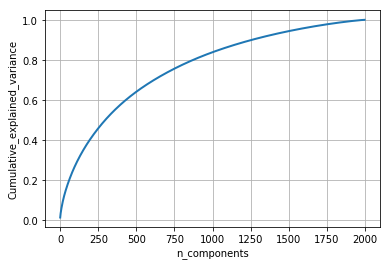

In [14]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 1999
pca_data = pca.fit_transform(X_train)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 1250-dimensions, approx. 90% of variance is expalined.

In [15]:
svd = TruncatedSVD(n_components=1250)
X_train = svd.fit_transform(train)
X_cv = svd.transform(cv)
X_test = svd.transform(test)
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)

(40000, 1250)
(10000, 1250)
(10000, 1250)


In [16]:
for i in tqdm(range(1,30,2)):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree')

    # fitting the model on train Data
    knn.fit(X_train, y_train)

    # predict the response on the crossvalidation data
    pred = knn.predict(X_cv)

    print("*************************************************************************")
    print("For k = ",i)
    print('Accuracy = ', accuracy_score(y_cv, pred)*100)
    print("f1_score = ",np.round(f1_score(y_cv, pred, average='macro')*100))
    print("precision_score = ",np.round(precision_score(y_cv, pred, average='macro')*100))
    print("recall_score = ",np.round(recall_score(y_cv, pred, average='macro')*100))

  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

*************************************************************************
For k =  1
Accuracy =  85.92
f1_score =  53.0
precision_score =  58.0
recall_score =  53.0


  7%|█████▎                                                                         | 1/15 [17:26<4:04:04, 1046.00s/it]

*************************************************************************
For k =  3
Accuracy =  87.29
f1_score =  53.0
precision_score =  64.0
recall_score =  53.0


 13%|██████████▌                                                                    | 2/15 [34:58<3:47:02, 1047.92s/it]

*************************************************************************
For k =  5
Accuracy =  87.87
f1_score =  53.0
precision_score =  70.0
recall_score =  53.0


 20%|███████████████▊                                                               | 3/15 [52:16<3:28:58, 1044.88s/it]

*************************************************************************
For k =  7
Accuracy =  87.44
f1_score =  56.0
precision_score =  67.0
recall_score =  55.0


 27%|████████████████████▌                                                        | 4/15 [1:10:51<3:15:25, 1065.98s/it]

*************************************************************************
For k =  9
Accuracy =  87.96000000000001
f1_score =  57.0
precision_score =  71.0
recall_score =  56.0


 33%|█████████████████████████▋                                                   | 5/15 [1:29:45<3:01:05, 1086.55s/it]

*************************************************************************
For k =  11
Accuracy =  88.31
f1_score =  57.0
precision_score =  75.0
recall_score =  55.0


 40%|██████████████████████████████▊                                              | 6/15 [1:47:43<2:42:34, 1083.81s/it]

*************************************************************************
For k =  13
Accuracy =  88.41
f1_score =  56.0
precision_score =  77.0
recall_score =  55.0


 47%|███████████████████████████████████▉                                         | 7/15 [2:05:06<2:22:52, 1071.57s/it]

*************************************************************************
For k =  15
Accuracy =  88.39
f1_score =  55.0
precision_score =  79.0
recall_score =  54.0


 53%|█████████████████████████████████████████                                    | 8/15 [2:22:39<2:04:22, 1066.12s/it]

*************************************************************************
For k =  17
Accuracy =  88.41
f1_score =  53.0
precision_score =  82.0
recall_score =  53.0


 60%|██████████████████████████████████████████████▏                              | 9/15 [2:40:04<1:45:58, 1059.77s/it]

*************************************************************************
For k =  19
Accuracy =  88.35
f1_score =  53.0
precision_score =  81.0
recall_score =  53.0


 67%|██████████████████████████████████████████████████▋                         | 10/15 [2:57:26<1:27:52, 1054.45s/it]

*************************************************************************
For k =  21
Accuracy =  88.49000000000001
f1_score =  53.0
precision_score =  87.0
recall_score =  53.0


 73%|███████████████████████████████████████████████████████▋                    | 11/15 [3:15:32<1:10:55, 1063.93s/it]

*************************************************************************
For k =  23
Accuracy =  88.46000000000001
f1_score =  53.0
precision_score =  88.0
recall_score =  53.0


 80%|██████████████████████████████████████████████████████████████▍               | 12/15 [3:33:44<53:37, 1072.36s/it]

*************************************************************************
For k =  25
Accuracy =  88.34
f1_score =  52.0
precision_score =  87.0
recall_score =  53.0


 87%|███████████████████████████████████████████████████████████████████▌          | 13/15 [3:51:51<35:53, 1076.73s/it]

*************************************************************************
For k =  27
Accuracy =  88.31
f1_score =  51.0
precision_score =  88.0
recall_score =  52.0


 93%|████████████████████████████████████████████████████████████████████████▊     | 14/15 [4:10:04<18:01, 1081.47s/it]

*************************************************************************
For k =  29
Accuracy =  88.31
f1_score =  51.0
precision_score =  92.0
recall_score =  52.0


100%|██████████████████████████████████████████████████████████████████████████████| 15/15 [4:27:48<00:00, 1076.17s/it]


***Test Data Report***
Best k = 13 
Accuracy =  88.07000000000001
f1_score =  55.0
precision_score =  74.0
recall_score =  54.0


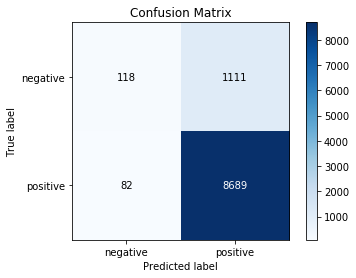

In [17]:
knn = KNeighborsClassifier(n_neighbors=13,algorithm='kd_tree')
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print("***Test Data Report***")
print("Best k = 13 ")
print('Accuracy = ', accuracy_score(y_test, pred)*100)
print("f1_score = ",np.round(f1_score(y_test, pred, average='macro')*100))
print("precision_score = ",np.round(precision_score(y_test, pred, average='macro')*100))
print("recall_score = ",np.round(recall_score(y_test, pred, average='macro')*100))
skplt.metrics.plot_confusion_matrix(y_test, pred)
plt.show()

## OBSERVATION :-
- > TF-IDF | BRUTE |
    1. K = 7
    2. f1_score =  54.0
    3. Accuracy =  88.13
- > TF-IDF | KD_TREE |
    1. k = 13
    2. f1_score =  55.0
    3. Accuracy =  88.07000000000001
    
- F1 score is better in kd-tree as comapared to brute force algorithm in TF-IDF

# W2VEC

In [19]:
import gensim
i=0
list_of_sent_train=[]
for sent in tqdm(X_train_data['Text'].values):
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    # checking is the word is alphabet
                filtered_sentence.append(cleaned_words.lower()) # appending to the list
            else:
                continue 
    list_of_sent_train.append(filtered_sentence)

100%|██████████████████████████████████████████████████████████████████████████| 40000/40000 [00:11<00:00, 3599.09it/s]


In [20]:
print(X_train_data['Text'].values[0])
print("*****************************************************************")
print(list_of_sent_train[0])

this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college
*****************************************************************
['this', 'witty', 'little', 'book', 'makes', 'my', 'son', 'laugh', 'at', 'loud', 'i', 'recite', 'it', 'in', 'the', 'car', 'as', 'were', 'driving', 'along', 'and', 'he', 'always', 'can', 'sing', 'the', 'refrain', 'hes', 'learned', 'about', 'whales', 'india', 'drooping', 'i', 'love', 'all', 'the', 'new', 'words', 'this', 'book', 'introduces', 'and', 'the', 'silliness', 'of', 'it', 'all', 'this', 'is', 'a', 'classic', 'book', 'i', 'am', 'willing', 'to', 'bet', 'my', 'son', 'will', 'still', 'be', 'able', 'to', 'recite', 'from', 'memory', 'when', 'he', 'is'

In [21]:
w2v_model=gensim.models.Word2Vec(list_of_sent_train,min_count=5,size=50, workers=6)

In [22]:
words = list(w2v_model.wv.vocab)
print(len(words))

12405


In [23]:
w2v_model.wv.most_similar('good')

[('great', 0.8216289281845093),
 ('decent', 0.7488343715667725),
 ('fine', 0.7407888174057007),
 ('fantastic', 0.7270007133483887),
 ('amazing', 0.7051384449005127),
 ('bad', 0.6884120106697083),
 ('yummy', 0.6597673892974854),
 ('awesome', 0.6592874526977539),
 ('fabulous', 0.6558119058609009),
 ('ok', 0.6535512208938599)]

In [24]:
w2v_model.wv.most_similar('tasty')

[('satisfying', 0.8282861709594727),
 ('filling', 0.8066790103912354),
 ('yummy', 0.7988016605377197),
 ('delicious', 0.7879558801651001),
 ('light', 0.7516793608665466),
 ('flavorful', 0.7407199144363403),
 ('crunchy', 0.7264057993888855),
 ('moist', 0.7226179242134094),
 ('nutritious', 0.7146416902542114),
 ('addicting', 0.6973412036895752)]

In [25]:
import gensim
i=0
list_of_sent_cv=[]
for sent in tqdm(X_cv_data['Text'].values):
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    # checking is the word is alphabet
                filtered_sentence.append(cleaned_words.lower()) # appending to the list
            else:
                continue 
    list_of_sent_cv.append(filtered_sentence)

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 3187.41it/s]


In [26]:
import gensim
i=0
list_of_sent_test=[]
for sent in tqdm(X_test_data['Text'].values):
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    # checking is the word is alphabet
                filtered_sentence.append(cleaned_words.lower()) # appending to the list
            else:
                continue 
    list_of_sent_test.append(filtered_sentence)

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3620.47it/s]


# AVG - W2VEC

In [27]:
#TRAIN Data
# average Word2Vec
# compute average word2vec for each review.
sent_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent_train): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors_train.append(sent_vec)
print(len(sent_vectors_train))
print(len(sent_vectors_train[0]))

100%|██████████████████████████████████████████████████████████████████████████| 40000/40000 [00:14<00:00, 2720.57it/s]


40000
50


In [28]:
#CV Data
# average Word2Vec
# compute average word2vec for each review.
sent_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent_cv): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors_cv.append(sent_vec)
print(len(sent_vectors_cv))
print(len(sent_vectors_cv[0]))

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2840.01it/s]


10000
50


In [29]:
#TEST Data
# average Word2Vec
# compute average word2vec for each review.
sent_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent_test): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
print(len(sent_vectors_test))
print(len(sent_vectors_test[0]))

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2801.53it/s]


10000
50


In [30]:
X_train = sent_vectors_train
X_cv = sent_vectors_cv
X_test = sent_vectors_test

# AVG - W2VEC | BRUTE |

In [31]:
for i in tqdm(range(1,30,2)):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute')

    # fitting the model on train Data
    knn.fit(X_train, y_train)

    # predict the response on the crossvalidation data
    pred = knn.predict(X_cv)

    print("*************************************************************************")
    print("For k = ",i)
    print('Accuracy = ', accuracy_score(y_cv, pred)*100)
    print("f1_score = ",np.round(f1_score(y_cv, pred, average='macro')*100))
    print("precision_score = ",np.round(precision_score(y_cv, pred, average='macro')*100))
    print("recall_score = ",np.round(recall_score(y_cv, pred, average='macro')*100))

  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

*************************************************************************
For k =  1
Accuracy =  85.17
f1_score =  61.0
precision_score =  63.0
recall_score =  60.0


  7%|█████▌                                                                             | 1/15 [00:10<02:25, 10.40s/it]

*************************************************************************
For k =  3
Accuracy =  87.64
f1_score =  61.0
precision_score =  69.0
recall_score =  59.0


 13%|███████████                                                                        | 2/15 [00:20<02:13, 10.29s/it]

*************************************************************************
For k =  5
Accuracy =  88.12
f1_score =  60.0
precision_score =  72.0
recall_score =  58.0


 20%|████████████████▌                                                                  | 3/15 [00:35<02:21, 11.82s/it]

*************************************************************************
For k =  7
Accuracy =  88.5
f1_score =  60.0
precision_score =  75.0
recall_score =  57.0


 27%|██████████████████████▏                                                            | 4/15 [00:49<02:14, 12.26s/it]

*************************************************************************
For k =  9
Accuracy =  88.56
f1_score =  59.0
precision_score =  76.0
recall_score =  57.0


 33%|███████████████████████████▋                                                       | 5/15 [01:02<02:05, 12.59s/it]

*************************************************************************
For k =  11
Accuracy =  88.58
f1_score =  58.0
precision_score =  77.0
recall_score =  56.0


 40%|█████████████████████████████████▏                                                 | 6/15 [01:16<01:56, 12.97s/it]

*************************************************************************
For k =  13
Accuracy =  88.59
f1_score =  58.0
precision_score =  77.0
recall_score =  56.0


 47%|██████████████████████████████████████▋                                            | 7/15 [01:30<01:46, 13.32s/it]

*************************************************************************
For k =  15
Accuracy =  88.55
f1_score =  57.0
precision_score =  78.0
recall_score =  56.0


 53%|████████████████████████████████████████████▎                                      | 8/15 [01:44<01:35, 13.62s/it]

*************************************************************************
For k =  17
Accuracy =  88.53999999999999
f1_score =  57.0
precision_score =  78.0
recall_score =  55.0


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [01:58<01:22, 13.68s/it]

*************************************************************************
For k =  19
Accuracy =  88.53999999999999
f1_score =  56.0
precision_score =  79.0
recall_score =  55.0


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [02:12<01:08, 13.77s/it]

*************************************************************************
For k =  21
Accuracy =  88.49000000000001
f1_score =  56.0
precision_score =  78.0
recall_score =  55.0


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [02:26<00:54, 13.70s/it]

*************************************************************************
For k =  23
Accuracy =  88.5
f1_score =  56.0
precision_score =  79.0
recall_score =  55.0


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [02:39<00:40, 13.62s/it]

*************************************************************************
For k =  25
Accuracy =  88.55
f1_score =  56.0
precision_score =  80.0
recall_score =  55.0


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [02:53<00:27, 13.64s/it]

*************************************************************************
For k =  27
Accuracy =  88.5
f1_score =  55.0
precision_score =  80.0
recall_score =  55.0


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [03:07<00:13, 13.86s/it]

*************************************************************************
For k =  29
Accuracy =  88.46000000000001
f1_score =  55.0
precision_score =  80.0
recall_score =  54.0


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [03:22<00:00, 14.02s/it]


***Test Data Report***
Best k = 17 
Accuracy =  88.39
f1_score =  56.0
precision_score =  78.0
recall_score =  55.0


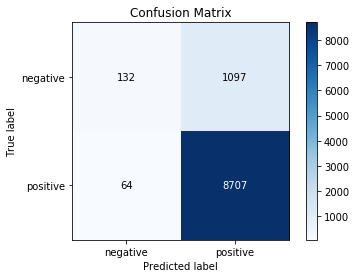

In [32]:
knn = KNeighborsClassifier(n_neighbors=17,algorithm='brute')
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print("***Test Data Report***")
print("Best k = 17 ")
print('Accuracy = ', accuracy_score(y_test, pred)*100)
print("f1_score = ",np.round(f1_score(y_test, pred, average='macro')*100))
print("precision_score = ",np.round(precision_score(y_test, pred, average='macro')*100))
print("recall_score = ",np.round(recall_score(y_test, pred, average='macro')*100))
skplt.metrics.plot_confusion_matrix(y_test, pred)
plt.show()

# AVG - W2VEC | KD_TREE |

In [33]:
for i in tqdm(range(1,30,2)):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree')

    # fitting the model on train Data
    knn.fit(X_train, y_train)

    # predict the response on the crossvalidation data
    pred = knn.predict(X_cv)

    print("*************************************************************************")
    print("For k = ",i)
    print('Accuracy = ', accuracy_score(y_cv, pred)*100)
    print("f1_score = ",np.round(f1_score(y_cv, pred, average='macro')*100))
    print("precision_score = ",np.round(precision_score(y_cv, pred, average='macro')*100))
    print("recall_score = ",np.round(recall_score(y_cv, pred, average='macro')*100))

  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

*************************************************************************
For k =  1
Accuracy =  85.17
f1_score =  61.0
precision_score =  63.0
recall_score =  60.0


  7%|█████▌                                                                             | 1/15 [01:11<16:38, 71.34s/it]

*************************************************************************
For k =  3
Accuracy =  87.64
f1_score =  61.0
precision_score =  69.0
recall_score =  59.0


 13%|███████████                                                                        | 2/15 [02:27<15:47, 72.88s/it]

*************************************************************************
For k =  5
Accuracy =  88.12
f1_score =  60.0
precision_score =  72.0
recall_score =  58.0


 20%|████████████████▌                                                                  | 3/15 [03:42<14:42, 73.50s/it]

*************************************************************************
For k =  7
Accuracy =  88.5
f1_score =  60.0
precision_score =  75.0
recall_score =  57.0


 27%|██████████████████████▏                                                            | 4/15 [04:58<13:34, 74.05s/it]

*************************************************************************
For k =  9
Accuracy =  88.56
f1_score =  59.0
precision_score =  76.0
recall_score =  57.0


 33%|███████████████████████████▋                                                       | 5/15 [06:13<12:24, 74.49s/it]

*************************************************************************
For k =  11
Accuracy =  88.58
f1_score =  58.0
precision_score =  77.0
recall_score =  56.0


 40%|█████████████████████████████████▏                                                 | 6/15 [07:30<11:18, 75.34s/it]

*************************************************************************
For k =  13
Accuracy =  88.59
f1_score =  58.0
precision_score =  77.0
recall_score =  56.0


 47%|██████████████████████████████████████▋                                            | 7/15 [08:48<10:06, 75.87s/it]

*************************************************************************
For k =  15
Accuracy =  88.55
f1_score =  57.0
precision_score =  78.0
recall_score =  56.0


 53%|████████████████████████████████████████████▎                                      | 8/15 [10:04<08:52, 76.09s/it]

*************************************************************************
For k =  17
Accuracy =  88.53999999999999
f1_score =  57.0
precision_score =  78.0
recall_score =  55.0


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [11:21<07:37, 76.30s/it]

*************************************************************************
For k =  19
Accuracy =  88.53999999999999
f1_score =  56.0
precision_score =  79.0
recall_score =  55.0


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [12:38<06:22, 76.49s/it]

*************************************************************************
For k =  21
Accuracy =  88.49000000000001
f1_score =  56.0
precision_score =  78.0
recall_score =  55.0


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [13:56<05:07, 76.95s/it]

*************************************************************************
For k =  23
Accuracy =  88.5
f1_score =  56.0
precision_score =  79.0
recall_score =  55.0


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [15:14<03:52, 77.40s/it]

*************************************************************************
For k =  25
Accuracy =  88.55
f1_score =  56.0
precision_score =  80.0
recall_score =  55.0


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [16:32<02:34, 77.38s/it]

*************************************************************************
For k =  27
Accuracy =  88.5
f1_score =  55.0
precision_score =  80.0
recall_score =  55.0


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [17:51<01:17, 77.88s/it]

*************************************************************************
For k =  29
Accuracy =  88.46000000000001
f1_score =  55.0
precision_score =  80.0
recall_score =  54.0


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [19:09<00:00, 77.94s/it]


***Test Data Report***
Best k = 17 
Accuracy =  88.39
f1_score =  56.0
precision_score =  78.0
recall_score =  55.0


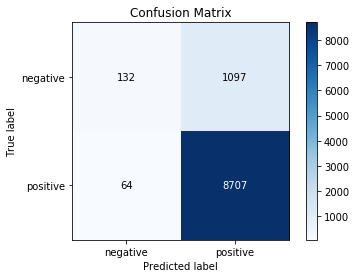

In [36]:
knn = KNeighborsClassifier(n_neighbors=17,algorithm='kd_tree')
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print("***Test Data Report***")
print("Best k = 17 ")
print('Accuracy = ', accuracy_score(y_test, pred)*100)
print("f1_score = ",np.round(f1_score(y_test, pred, average='macro')*100))
print("precision_score = ",np.round(precision_score(y_test, pred, average='macro')*100))
print("recall_score = ",np.round(recall_score(y_test, pred, average='macro')*100))
skplt.metrics.plot_confusion_matrix(y_test, pred)
plt.show()

## OBSERVATION :-
- > AVG W2VEC | BRUTE |
    1. K = 17
    2. f1_score =  56
    3. Accuracy =  88.39
- > AVG W2VEC | KD_TREE |
    1. k = 17
    2. f1_score =  56
    3. Accuracy =  88.39
- Test data report for both the algorithms in AVG-W2VEC give similar results and K is same in both the cases as well

# TF - IDF W2VEC

In [37]:
tfidf_vect = TfidfVectorizer()
train_tfidf_w2v = tfidf_vect.fit_transform(X_train_data["CleanedText"])
cv_tfidf_w2v = tfidf_vect.transform(X_cv_data["CleanedText"])
test_tfidf_w2v = tfidf_vect.transform(X_test_data["CleanedText"])
print(train_tfidf_w2v.shape)
print(cv_tfidf_w2v.shape)
print(test_tfidf_w2v.shape)

(40000, 24413)
(10000, 24413)
(10000, 24413)


In [39]:
# TF-IDF weighted Word2Vec
tfidf_feat = tfidf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors_train = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent_train): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = train_tfidf_w2v[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors_train.append(sent_vec)
    row += 1

100%|████████████████████████████████████████████████████████████████████████████| 40000/40000 [30:23<00:00, 21.94it/s]


In [40]:
# TF-IDF weighted Word2Vec
tfidf_feat = tfidf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors_cv = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent_cv): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = cv_tfidf_w2v[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors_cv.append(sent_vec)
    row += 1

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [07:54<00:00, 19.53it/s]


In [41]:
# TF-IDF weighted Word2Vec
tfidf_feat = tfidf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent_test): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = test_tfidf_w2v[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors_test.append(sent_vec)
    row += 1

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [07:38<00:00, 21.81it/s]


In [52]:
X_train = tfidf_sent_vectors_train
X_cv = tfidf_sent_vectors_cv
X_test = tfidf_sent_vectors_test

In [53]:
X_train = np.nan_to_num(X_train)
X_cv = np.nan_to_num(X_cv)
X_test = np.nan_to_num(X_test)


# TF-IDF - W2VEC | BRUTE |

In [54]:
for i in tqdm(range(1,30,2)):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute')

    # fitting the model on train Data
    knn.fit(X_train, y_train)

    # predict the response on the crossvalidation data
    pred = knn.predict(X_cv)

    print("*************************************************************************")
    print("For k = ",i)
    print('Accuracy = ', accuracy_score(y_cv, pred)*100)
    print("f1_score = ",np.round(f1_score(y_cv, pred, average='macro')*100))
    print("precision_score = ",np.round(precision_score(y_cv, pred, average='macro')*100))
    print("recall_score = ",np.round(recall_score(y_cv, pred, average='macro')*100))

  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

*************************************************************************
For k =  1
Accuracy =  82.0
f1_score =  57.0
precision_score =  57.0
recall_score =  57.0


  7%|█████▌                                                                             | 1/15 [00:11<02:36, 11.16s/it]

*************************************************************************
For k =  3
Accuracy =  86.0
f1_score =  57.0
precision_score =  62.0
recall_score =  56.0


 13%|███████████                                                                        | 2/15 [00:22<02:24, 11.10s/it]

*************************************************************************
For k =  5
Accuracy =  87.0
f1_score =  56.0
precision_score =  66.0
recall_score =  55.0


 20%|████████████████▌                                                                  | 3/15 [00:36<02:24, 12.03s/it]

*************************************************************************
For k =  7
Accuracy =  88.0
f1_score =  55.0
precision_score =  69.0
recall_score =  54.0


 27%|██████████████████████▏                                                            | 4/15 [00:50<02:19, 12.67s/it]

*************************************************************************
For k =  9
Accuracy =  88.0
f1_score =  55.0
precision_score =  72.0
recall_score =  54.0


 33%|███████████████████████████▋                                                       | 5/15 [01:04<02:11, 13.18s/it]

*************************************************************************
For k =  11
Accuracy =  88.0
f1_score =  54.0
precision_score =  73.0
recall_score =  54.0


 40%|█████████████████████████████████▏                                                 | 6/15 [01:20<02:04, 13.79s/it]

*************************************************************************
For k =  13
Accuracy =  88.0
f1_score =  53.0
precision_score =  75.0
recall_score =  53.0


 47%|██████████████████████████████████████▋                                            | 7/15 [01:33<01:50, 13.82s/it]

*************************************************************************
For k =  15
Accuracy =  88.0
f1_score =  52.0
precision_score =  75.0
recall_score =  53.0


 53%|████████████████████████████████████████████▎                                      | 8/15 [01:47<01:36, 13.74s/it]

*************************************************************************
For k =  17
Accuracy =  88.0
f1_score =  52.0
precision_score =  76.0
recall_score =  53.0


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [02:01<01:22, 13.68s/it]

*************************************************************************
For k =  19
Accuracy =  88.0
f1_score =  52.0
precision_score =  76.0
recall_score =  52.0


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [02:14<01:08, 13.75s/it]

*************************************************************************
For k =  21
Accuracy =  88.0
f1_score =  52.0
precision_score =  77.0
recall_score =  53.0


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [02:28<00:54, 13.65s/it]

*************************************************************************
For k =  23
Accuracy =  88.0
f1_score =  51.0
precision_score =  77.0
recall_score =  52.0


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [02:42<00:41, 13.81s/it]

*************************************************************************
For k =  25
Accuracy =  88.0
f1_score =  51.0
precision_score =  77.0
recall_score =  52.0


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [02:56<00:27, 13.71s/it]

*************************************************************************
For k =  27
Accuracy =  88.0
f1_score =  51.0
precision_score =  77.0
recall_score =  52.0


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [03:09<00:13, 13.70s/it]

*************************************************************************
For k =  29
Accuracy =  88.0
f1_score =  51.0
precision_score =  78.0
recall_score =  52.0


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [03:23<00:00, 13.63s/it]


***Test Data Report***
Best k = 19 
Accuracy =  88.0
f1_score =  51.0
precision_score =  74.0
recall_score =  52.0


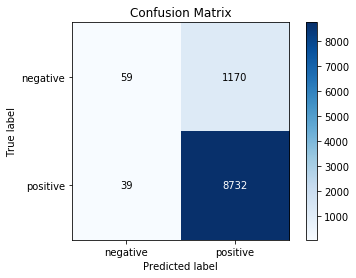

In [58]:
knn = KNeighborsClassifier(n_neighbors=21,algorithm='brute')
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print("***Test Data Report***")
print("Best k = 21 ")
print('Accuracy = ', accuracy_score(y_test, pred)*100)
print("f1_score = ",np.round(f1_score(y_test, pred, average='macro')*100))
print("precision_score = ",np.round(precision_score(y_test, pred, average='macro')*100))
print("recall_score = ",np.round(recall_score(y_test, pred, average='macro')*100))
skplt.metrics.plot_confusion_matrix(y_test, pred)
plt.show()

# TF-IDF - W2VEC | KD_TREE |

In [62]:
for i in tqdm(range(1,30,2)):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree')

    # fitting the model on train Data
    knn.fit(X_train, y_train)

    # predict the response on the crossvalidation data
    pred = knn.predict(X_cv)

    print("*************************************************************************")
    print("For k = ",i)
    print('Accuracy = ', accuracy_score(y_cv, pred)*100)
    print("f1_score = ",np.round(f1_score(y_cv, pred, average='macro')*100))
    print("precision_score = ",np.round(precision_score(y_cv, pred, average='macro')*100))
    print("recall_score = ",np.round(recall_score(y_cv, pred, average='macro')*100))

  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

*************************************************************************
For k =  1
Accuracy =  82.0
f1_score =  57.0
precision_score =  57.0
recall_score =  57.0


  7%|█████▌                                                                             | 1/15 [01:13<17:04, 73.20s/it]

*************************************************************************
For k =  3
Accuracy =  86.0
f1_score =  57.0
precision_score =  62.0
recall_score =  56.0


 13%|███████████                                                                        | 2/15 [02:29<16:03, 74.10s/it]

*************************************************************************
For k =  5
Accuracy =  87.0
f1_score =  56.0
precision_score =  66.0
recall_score =  55.0


 20%|████████████████▌                                                                  | 3/15 [03:40<14:40, 73.34s/it]

*************************************************************************
For k =  7
Accuracy =  88.0
f1_score =  55.0
precision_score =  69.0
recall_score =  54.0


 27%|██████████████████████▏                                                            | 4/15 [05:01<13:49, 75.38s/it]

*************************************************************************
For k =  9
Accuracy =  88.0
f1_score =  55.0
precision_score =  72.0
recall_score =  54.0


 33%|███████████████████████████▋                                                       | 5/15 [06:20<12:46, 76.63s/it]

*************************************************************************
For k =  11
Accuracy =  88.0
f1_score =  54.0
precision_score =  73.0
recall_score =  54.0


 40%|█████████████████████████████████▏                                                 | 6/15 [07:35<11:26, 76.24s/it]

*************************************************************************
For k =  13
Accuracy =  88.0
f1_score =  53.0
precision_score =  75.0
recall_score =  53.0


 47%|██████████████████████████████████████▋                                            | 7/15 [08:52<10:11, 76.38s/it]

*************************************************************************
For k =  15
Accuracy =  88.0
f1_score =  52.0
precision_score =  75.0
recall_score =  53.0


 53%|████████████████████████████████████████████▎                                      | 8/15 [10:06<08:49, 75.70s/it]

*************************************************************************
For k =  17
Accuracy =  88.0
f1_score =  52.0
precision_score =  76.0
recall_score =  53.0


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [11:22<07:34, 75.70s/it]

*************************************************************************
For k =  19
Accuracy =  88.0
f1_score =  52.0
precision_score =  76.0
recall_score =  52.0


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [12:36<06:15, 75.04s/it]

*************************************************************************
For k =  21
Accuracy =  88.0
f1_score =  52.0
precision_score =  77.0
recall_score =  53.0


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [13:52<05:02, 75.53s/it]

*************************************************************************
For k =  23
Accuracy =  88.0
f1_score =  51.0
precision_score =  77.0
recall_score =  52.0


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [15:07<03:46, 75.40s/it]

*************************************************************************
For k =  25
Accuracy =  88.0
f1_score =  51.0
precision_score =  77.0
recall_score =  52.0


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [16:22<02:30, 75.27s/it]

*************************************************************************
For k =  27
Accuracy =  88.0
f1_score =  51.0
precision_score =  77.0
recall_score =  52.0


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [17:37<01:15, 75.23s/it]

*************************************************************************
For k =  29
Accuracy =  88.0
f1_score =  51.0
precision_score =  78.0
recall_score =  52.0


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [18:52<00:00, 75.12s/it]


***Test Data Report***
Best k = 21 
Accuracy =  88.0
f1_score =  51.0
precision_score =  74.0
recall_score =  52.0


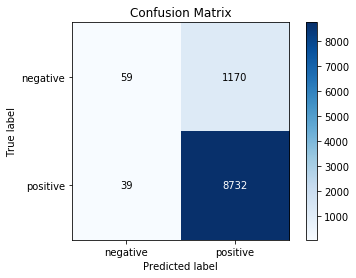

In [63]:
knn = KNeighborsClassifier(n_neighbors=21,algorithm='kd_tree')
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print("***Test Data Report***")
print("Best k = 21 ")
print('Accuracy = ', accuracy_score(y_test, pred)*100)
print("f1_score = ",np.round(f1_score(y_test, pred, average='macro')*100))
print("precision_score = ",np.round(precision_score(y_test, pred, average='macro')*100))
print("recall_score = ",np.round(recall_score(y_test, pred, average='macro')*100))
skplt.metrics.plot_confusion_matrix(y_test, pred)
plt.show()

## OBSERVATION :-

- > TF-IDF W2VEC | BRUTE |
    1. K = 19
    2. f1_score =  51.0
    3. Accuracy =  88.0
- > TF-IDF W2VEC | KD_TREE |
    1. K = 21
    2. f1_score =  51.0
    3. Accuracy =  88.0
- Test data report for both the algorithms in TFIDF-W2VEC give similar results but k is Different in both cases

# RESULT

In [38]:
from IPython.display import HTML, display
import tabulate
table = [["S.NO.","MODEL || KNN ||","Best K","F1_SCORE","Test Accuracy"],
         ["1","BOW | brute |","11","49","87.85"],
         ["2","BOW | kd_tree |","17","50","87.98"],
         ["3","TF-IDF | brute |","7","54","88.13"],
         ["4","TF-IDF | kd_tree |","13","55","88.07"],
         ["5","AVG W2VEC | brute |","17","56","88.39"],
         ["6","AVG W2VEC | kd_tree |","17","56","88.39"],
         ["7","TF-IDF W2VEC | brute |","19","51.0","88"],
         ["8","TF-IDF W2VEC | kd_tree |","21","51.0","88"]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

S.NO.,MODEL || KNN ||,Best K,F1_SCORE,Test Accuracy
1,BOW | brute |,11,49,87.85
2,BOW | kd_tree |,17,50,87.98
3,TF-IDF | brute |,7,54,88.13
4,TF-IDF | kd_tree |,13,55,88.07
5,AVG W2VEC | brute |,17,56,88.39
6,AVG W2VEC | kd_tree |,17,56,88.39
7,TF-IDF W2VEC | brute |,19,51.0,88
8,TF-IDF W2VEC | kd_tree |,21,51.0,88


# CONCLUSION
- AVG W2VEC(KD-TREE) & AVG W2VEC(BRUTE) gives the best accuracy rates amoung the models i.e 88.39
- BOW(BRUTE) gives the the least accuracy among the models.
- As amazon fine fodd reviews is a highly imbalanced dataset, so f1_score, precision_score, recall_score plays major role in understanding the model performance rather than the accuracy rates, as we can see the the above results